# Case Study
Let's proceed with the tutorial for outlier detection using the "Credit Card Fraud Detection" dataset. We'll cover the following steps:

1.  Load the dataset.
1.  Apply Z-score method for outlier detection.
1. Apply IQR method for outlier detection.
1. Apply One-Class SVM method for outlier detection.
1. Apply Isolation Forest method for outlier detection.
1. Apply DBSCAN method for outlier detection.
1. Apply LOF method for outlier detection.
1. Let's start with Step 1: Load the dataset.

## Step 1: Load the Dataset
In this code, we load the dataset into a pandas DataFrame named df using the pd.read_csv() function. We then print the first few rows of the dataset using df.head(), display the data types and non-null counts of each column using df.info(), and provide basic statistical summaries using df.describe().

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN

# Step 1: Load the dataset
df = pd.read_csv('/content/creditcard.csv')
df= df.sample(10000)
# Explore the dataset
print(df.head())
print(df.info())
print(df.describe())


            Time        V1        V2        V3        V4        V5        V6  \
128634   78785.0 -0.659717  1.183753  0.483915  1.210817 -0.035700  0.188756   
224924  144024.0  1.997011  0.110559 -1.608624  0.337948  0.447722 -0.561137   
266887  162525.0  2.047366  0.081031 -1.782673  0.251559  0.558326 -0.433816   
72073    54554.0  1.377808 -1.975197  0.013025 -1.915389  0.035267  4.520147   
145549   87041.0 -1.690957  2.297320  0.088259 -1.348462  1.239065 -1.195810   

              V7        V8        V9  ...       V21       V22       V23  \
128634  0.587158  0.505609 -0.997043  ...  0.248231  0.827323  0.105537   
224924  0.109484 -0.100417  0.157042  ... -0.286172 -0.745629  0.344806   
266887  0.059302 -0.059358  0.291644  ... -0.330798 -0.896494  0.302621   
72073  -2.459011  1.203601 -0.376902  ... -0.340203 -0.349072 -0.073197   
145549  2.715813 -2.112286  3.660540  ... -0.446350  1.275375 -0.325042   

             V24       V25       V26       V27       V28  Amount  Cl

In [83]:
df['Class'].value_counts()

0    9984
1      16
Name: Class, dtype: int64

## Step 2: Apply Z-score method for outlier detection.

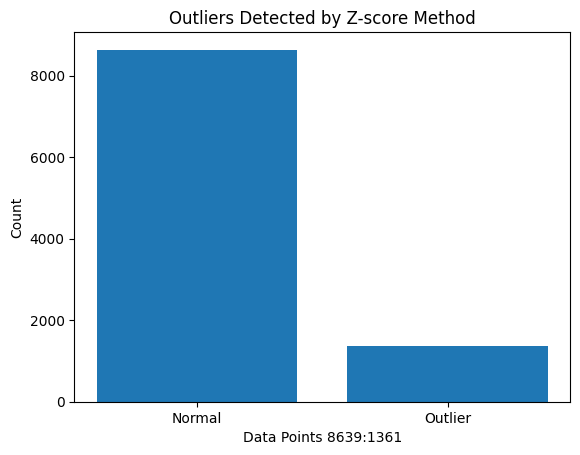

0    1348
1      13
Name: Class, dtype: int64

In [85]:
# Step 2: Apply Z-score method for outlier detection
z_scores = np.abs(StandardScaler().fit_transform(df.drop('Class', axis=1)))
threshold = 3

# Identify outliers based on the threshold
outliers_zscore = (z_scores > threshold).any(axis=1)

# Visualize the number of outliers detected by Z-score method
plt.bar(['Normal', 'Outlier'], [len(df) - outliers_zscore.sum(), outliers_zscore.sum()])
plt.xlabel(f'Data Points {len(df) - outliers_zscore.sum()}:{outliers_zscore.sum()}')
plt.ylabel('Count')
plt.title('Outliers Detected by Z-score Method')
plt.show()
df[outliers_zscore]['Class'].value_counts()

## Step 3: Apply IQR method for outlier detection.
In this code, we apply the IQR method to the features (excluding the 'Class' column) to identify outliers. We calculate the first quartile (Q1), third quartile (Q3), and IQR for each feature. Data points falling outside the range (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR) in at least one feature are considered outliers.

We then visualize the number of outliers detected by the IQR method using a bar chart.

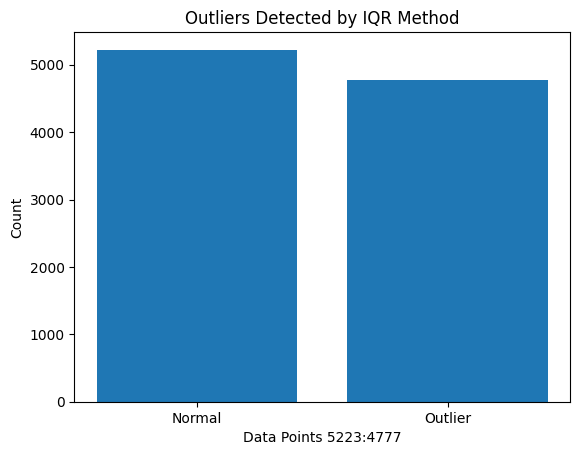

0    4761
1      16
Name: Class, dtype: int64

In [86]:
# Step 3: Apply IQR method for outlier detection
Q1 = df.drop('Class', axis=1).quantile(0.25)
Q3 = df.drop('Class', axis=1).quantile(0.75)
IQR = Q3 - Q1

# Define the outlier range based on IQR
outlier_range_lower = Q1 - 1.5 * IQR
outlier_range_upper = Q3 + 1.5 * IQR

# Identify outliers based on the IQR range
outliers_iqr = ((df.drop('Class', axis=1) < outlier_range_lower) | (df.drop('Class', axis=1) > outlier_range_upper)).any(axis=1)

# Visualize the number of outliers detected by IQR method
plt.bar(['Normal', 'Outlier'], [len(df) - outliers_iqr.sum(), outliers_iqr.sum()])
plt.xlabel(f'Data Points {len(df) - outliers_iqr.sum()}:{outliers_iqr.sum()}')
plt.ylabel('Count')
plt.title('Outliers Detected by IQR Method')
plt.show()
df[outliers_iqr]['Class'].value_counts()

##  Step 4: Apply One-Class SVM method for outlier detection.
In this code, we apply the One-Class SVM method for outlier detection. The nu parameter controls the fraction of data points considered as outliers by the model. You can adjust the nu value based on your preference.

We then visualize the number of outliers detected by the One-Class SVM method using a bar chart.

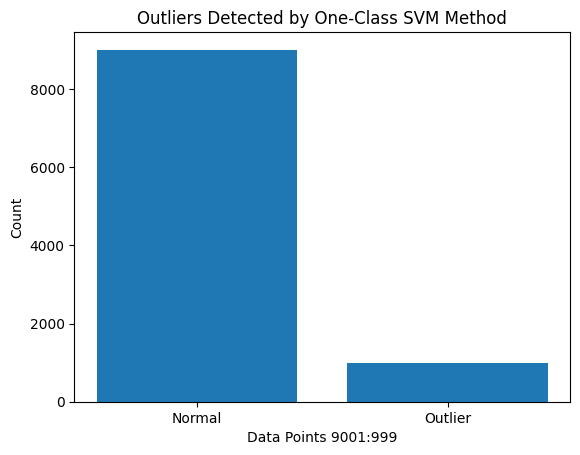

0    998
1      1
Name: Class, dtype: int64

In [90]:
# Step 4: Apply One-Class SVM method for outlier detection
df_svm = df.dropna()
ocsvm = OneClassSVM(nu=0.1)
outliers_ocsvm = ocsvm.fit_predict(df_svm.drop('Class', axis=1))

# Identify outliers based on the One-Class SVM predictions
outliers_ocsvm = outliers_ocsvm == -1

# Visualize the number of outliers detected by One-Class SVM method
plt.bar(['Normal', 'Outlier'], [len(df_svm) - outliers_ocsvm.sum(), outliers_ocsvm.sum()])
plt.xlabel(f'Data Points {len(df_svm) - outliers_ocsvm.sum()}:{outliers_ocsvm.sum()}')
plt.ylabel('Count')
plt.title('Outliers Detected by One-Class SVM Method')
plt.show()
df[outliers_ocsvm]['Class'].value_counts()

## Step 5: Apply Isolation Forest method for outlier detection
In this code, we apply the Isolation Forest method for outlier detection. The contamination parameter controls the expected proportion of outliers in the data. You can adjust the contamination value based on your preference.

We then visualize the number of outliers detected by the Isolation Forest method using a bar chart.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


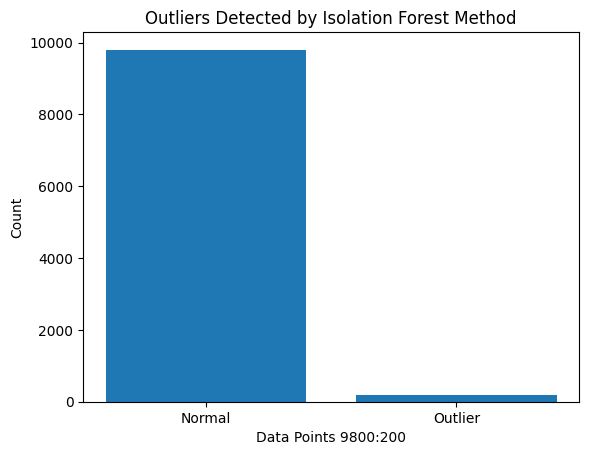

0    190
1     10
Name: Class, dtype: int64

In [100]:
# Step 5: Apply Isolation Forest method for outlier detection
isolation_forest = IsolationForest(contamination=0.02)
outliers_isolation_forest = isolation_forest.fit_predict(df.drop('Class', axis=1))

# Identify outliers based on the Isolation Forest predictions
outliers_isolation_forest = outliers_isolation_forest == -1

# Visualize the number of outliers detected by Isolation Forest method
plt.bar(['Normal', 'Outlier'], [len(df) - outliers_isolation_forest.sum(), outliers_isolation_forest.sum()])
plt.xlabel(f'Data Points {len(df) - outliers_isolation_forest.sum()}:{outliers_isolation_forest.sum()}')
plt.ylabel('Count')
plt.title('Outliers Detected by Isolation Forest Method')
plt.show()
df[outliers_isolation_forest]['Class'].value_counts()

## Step 6: Apply DBSCAN method for outlier detection.
In this code, we apply the DBSCAN method for outlier detection. The eps parameter defines the maximum distance between two samples for them to be considered as part of the same cluster. The min_samples parameter specifies the minimum number of samples in a neighborhood for a point to be considered as a core point.

We then visualize the number of outliers detected by the DBSCAN method using a bar chart.

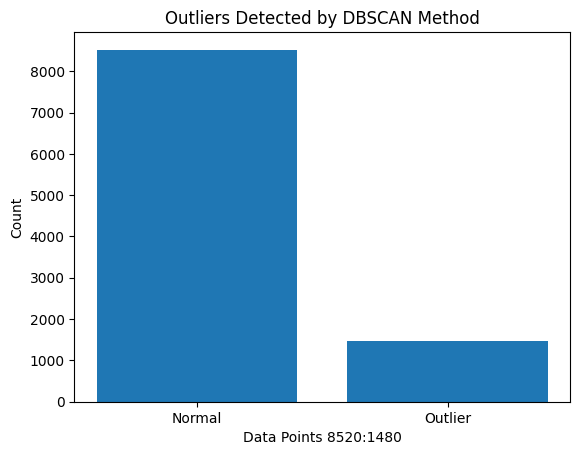

0    1472
1       8
Name: Class, dtype: int64

In [114]:
# Step 6: Apply DBSCAN method for outlier detection
dbscan = DBSCAN(eps=100, min_samples=5)
outliers_dbscan = dbscan.fit_predict(df.drop('Class', axis=1))

# Identify outliers based on the DBSCAN clustering results
outliers_dbscan = outliers_dbscan == -1

# Visualize the number of outliers detected by DBSCAN method
plt.bar(['Normal', 'Outlier'], [len(df) - outliers_dbscan.sum(), outliers_dbscan.sum()])
plt.xlabel(f'Data Points {len(df) - outliers_dbscan.sum()}:{outliers_dbscan.sum()}')
plt.ylabel('Count')
plt.title('Outliers Detected by DBSCAN Method')
plt.show()
df[outliers_dbscan]['Class'].value_counts()

## Step 7: Apply LOF method for outlier detection.
In this code, we apply the Local Outlier Factor (LOF) method for outlier detection. The n_neighbors parameter defines the number of neighbors considered for calculating the local density deviation of each data point. The contamination parameter controls the expected proportion of outliers in the data.

We then visualize the number of outliers detected by the LOF method using a bar chart.

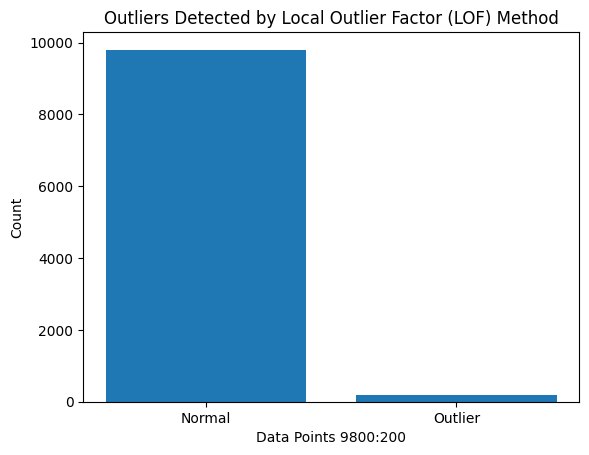

0    198
1      2
Name: Class, dtype: int64

In [141]:
# Step 7: Apply LOF method for outlier detection
lof = LocalOutlierFactor(n_neighbors=50, contamination=0.02)
outliers_lof = lof.fit_predict(df.drop('Class', axis=1))

# Identify outliers based on the LOF scores
outliers_lof = outliers_lof == -1

# Visualize the number of outliers detected by LOF method
plt.bar(['Normal', 'Outlier'], [len(df) - outliers_lof.sum(), outliers_lof.sum()])
plt.xlabel(f'Data Points {len(df) - outliers_lof.sum()}:{outliers_lof.sum()}')
plt.ylabel('Count')
plt.title('Outliers Detected by Local Outlier Factor (LOF) Method')
plt.show()
df[outliers_lof]['Class'].value_counts()

## Conclusion
In this specific context, not every model works well!

That completes the tutorial for outlier detection using different methods on the "Credit Card Fraud Detection" dataset. You can compare the performances of each method and adjust the hyperparameters to fine-tune the outlier detection for your specific use case.